# 📓 Chapter 11 Notebook  
## Nuclear Physics and Medicine  
### *Radioactive Decay, Half-Life, and Imaging Intuition (PET/SPECT)*

This notebook is beginner-friendly: most cells are “change a number → run → interpret.”  
Optional **advanced** cells are pre-filled (Monte Carlo decay, interactive sliders, detector heatmaps).


---
## 🧠 Learning Goals

By the end of this notebook, you will be able to:

- Model radioactive decay using an exponential law
- Interpret **half-life** and connect it to imaging timing
- Compare decay curves for commonly used medical isotopes (PET/SPECT examples)
- Simulate radioactive decay using a simple **Monte Carlo** model
- Visualize how detector counts form an image using a simplified grid model


---
## ✅ Setup (run once)

If you see missing package errors, run the install cell once and restart the kernel.


In [1]:
%pip install matplotlib numpy ipywidgets

   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   ---------------------------------------- 914.9/914.9 kB 8.3 MB/s  0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 2.4 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.2 MB 2.5 MB/s eta 0:00:01
   ---------------------------- ----------- 1.6/2.2 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 2.6 MB/s  0:00:00

   ------------- -------------------------- 1/3 [jupyterlab_widgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

---
## ☢️ Part 1 — Deterministic Radioactive Decay

Atoms decay over time, some faster than others depending on their stability. The decay of atoms can be simply modelled using:

$$
N(t) = N_0 e^{-\lambda t}
$$

Where:
- $N(t)$ is the number of undecayed nuclei at time $t$
- $N_0$ is the initial number
- $\lambda$ is the isotope specific decay constant (1/time)

Half-life $T_{1/2}$ is related to $\lambda$ by:

$$
T_{1/2} = \frac{\ln 2}{\lambda}
\quad\Rightarrow\quad
\lambda = \frac{\ln 2}{T_{1/2}}
$$


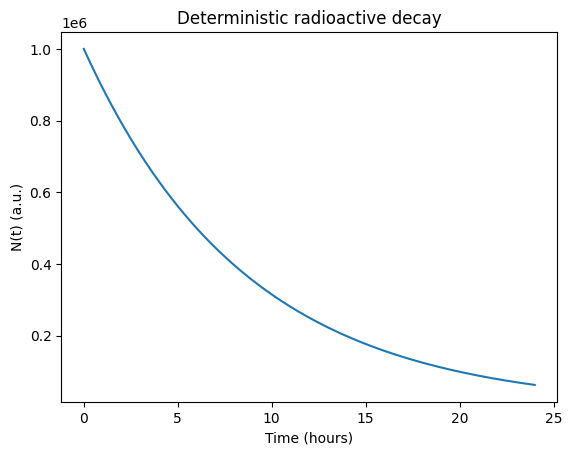

np.float64(0.11552453009332421)

In [3]:
# Choose a half-life and compute decay
T_half_hours = 6.0            # hours
N0 = 1_000_000                # initial nuclei (or "activity units")

lam = np.log(2) / T_half_hours   # 1/hour

t = np.linspace(0, 24, 400)       # hours
N = N0 * np.exp(-lam * t)

plt.plot(t, N)
plt.xlabel("Time (hours)")
plt.ylabel("N(t) (a.u.)")
plt.title("Deterministic radioactive decay")
plt.show()

lam

### Try this
Change `T_half_hours` and re-run.

**Interpretation:** Shorter half-life → faster decay → less time to acquire signal (but can reduce patient dose *after* imaging).  


---
## 📟 Part 2 — From Decay to Detector Counts (Activity)

Imaging systems detect **decays per unit time**.

Activity is:
$$
A(t) = \lambda N(t)
$$

If your scanner detects only a fraction of decays (efficiency $\epsilon$), then:

$$
\text{count rate}(t) \approx \epsilon A(t)
$$

Below, we plot a **count-rate curve** to connect decay physics to imaging signal.


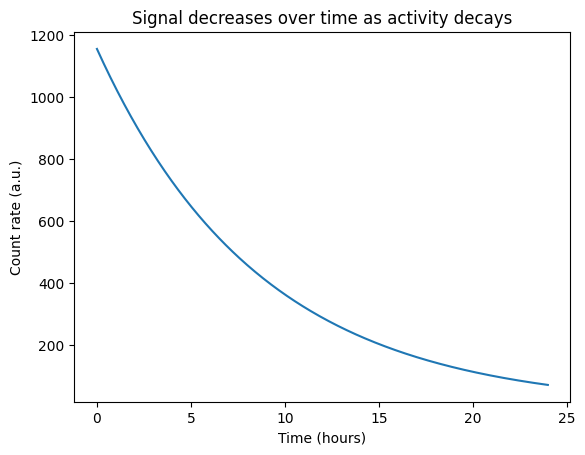

In [4]:
epsilon = 0.01  # 1% detection efficiency (illustrative)

A = lam * N
count_rate = epsilon * A

plt.plot(t, count_rate)
plt.xlabel("Time (hours)")
plt.ylabel("Count rate (a.u.)")
plt.title("Signal decreases over time as activity decays")
plt.show()

### Try this
Increase `epsilon` (better detector / geometry).  
Does the *shape* change, or only the scale?


---
## 🧪 Part 3 — Comparing Isotopes (PET vs SPECT timing intuition)

Medical isotopes are chosen based on:
- **Half-life** (how long signal lasts)
- **Decay type** (e.g., positron for PET; gamma for SPECT)
- Practicality (production, delivery, safety)

Below are typical half-lives (approximate, for educational use):
- PET: **F-18** (~1.8 h)  
- PET: **C-11** (~0.34 h)  
- SPECT: **Tc-99m** (~6 h)  
- SPECT: **I-123** (~13 h)

We’ll compare relative activity over time for the same initial activity.


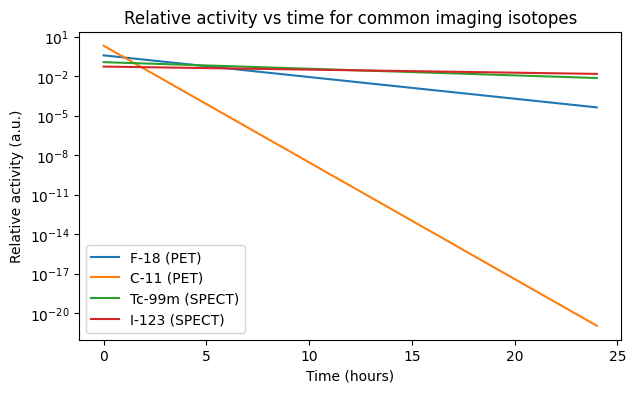

In [5]:
isotopes = {
    "F-18 (PET)": 1.83,
    "C-11 (PET)": 0.34,
    "Tc-99m (SPECT)": 6.0,
    "I-123 (SPECT)": 13.0
}

t = np.linspace(0, 24, 500)
N0 = 1.0  # relative

plt.figure(figsize=(7,4))
for name, T_half in isotopes.items():
    lam = np.log(2)/T_half
    A = lam * (N0*np.exp(-lam*t))   # relative activity
    plt.plot(t, A, label=name)

plt.xlabel("Time (hours)")
plt.ylabel("Relative activity (a.u.)")
plt.title("Relative activity vs time for common imaging isotopes")
plt.legend()
plt.yscale("log")
plt.show()

**Interpretation:**  
- Short half-life isotopes fall quickly (time-sensitive scans).  
- Longer half-life isotopes can support longer uptake times, but persist longer in the body.

(We used a log y-axis so you can see multiple curves clearly.)


---
## 🎲 Part 4 — Monte Carlo Decay (Optional but Intuitive)

The exponential decay law is an *average*.  
At small numbers of nuclei, decay looks **random**.

A simple Monte Carlo model:
- At each small time step $\Delta t$, each nucleus has probability $p \approx \lambda \Delta t$ to decay.
- We simulate random decay events and compare to the deterministic curve.

This cell is pre-filled — you can run it as-is.


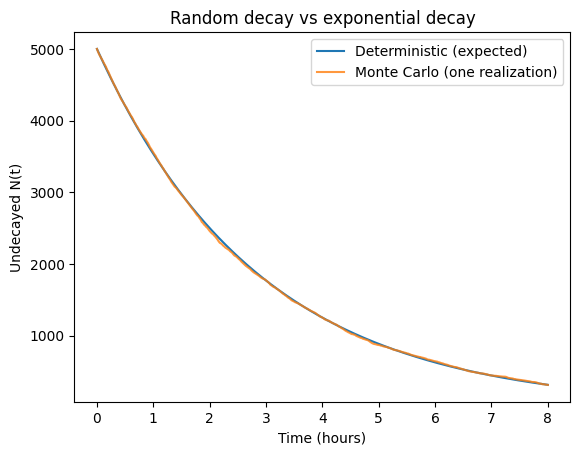

In [6]:
# Monte Carlo decay simulation
np.random.seed(0)

T_half = 2.0         # hours
lam = np.log(2)/T_half

N0 = 5000
dt = 0.02            # hours (~1.2 minutes)
t_end = 8.0          # hours
t = np.arange(0, t_end+dt, dt)

N_mc = np.zeros_like(t, dtype=float)
N_mc[0] = N0
N_current = N0

for i in range(1, len(t)):
    # decays in this step ~ Binomial(N_current, p)
    p = lam * dt
    decays = np.random.binomial(N_current, min(max(p, 0), 1))
    N_current -= decays
    N_mc[i] = N_current

N_det = N0 * np.exp(-lam*t)

plt.plot(t, N_det, label="Deterministic (expected)")
plt.plot(t, N_mc, label="Monte Carlo (one realization)", alpha=0.8)
plt.xlabel("Time (hours)")
plt.ylabel("Undecayed N(t)")
plt.title("Random decay vs exponential decay")
plt.legend()
plt.show()

---
## ⏱️ Part 5 — Half-life and Imaging Timing (Uptake vs Signal)

In nuclear medicine, there is often a trade-off:
- Wait longer → tracer distributes/accumulates in target tissue
- But wait longer → activity decays → lower count rate

A very simple model of “useful signal” might be:

$$
S(t) \propto A(t)\cdot U(t)
$$

Where $U(t)$ is a crude “uptake factor” that increases over time and saturates.
We’ll explore how the best imaging time depends on half-life.


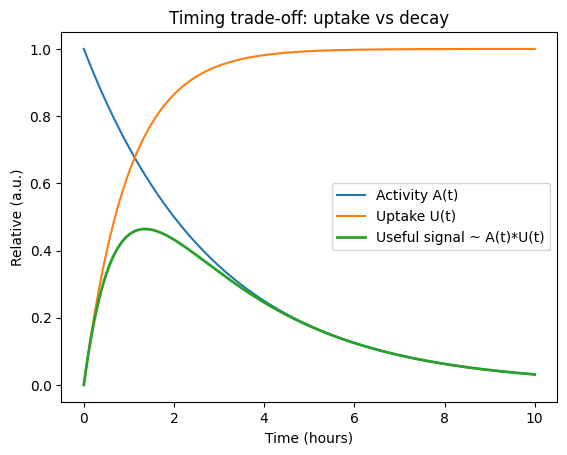

(np.float64(1.3533834586466165), np.float64(0.4639657637071168))

In [7]:
# Simple uptake model: U(t) = 1 - exp(-t/tau)
T_half = 2.0        # hours (try 2, 6, 13)
tau = 1.0           # hours (uptake time scale)

t = np.linspace(0, 10, 400)
lam = np.log(2)/T_half

A = np.exp(-lam*t)              # relative activity (scaled)
U = 1 - np.exp(-t/tau)          # uptake factor (0 -> 1)
S = A * U

plt.plot(t, A, label="Activity A(t)")
plt.plot(t, U, label="Uptake U(t)")
plt.plot(t, S, label="Useful signal ~ A(t)*U(t)", linewidth=2)
plt.xlabel("Time (hours)")
plt.ylabel("Relative (a.u.)")
plt.title("Timing trade-off: uptake vs decay")
plt.legend()
plt.show()

t[np.argmax(S)], S.max()

### Try this
- Increase `T_half` (longer-lived isotope). What happens to the best-time-to-image?  
- Increase `tau` (slower uptake). What happens?

This is a simplified model, but it captures a real clinical intuition.


---
## 🧩 Part 6 — Detector Counts as an “Image” (Simplified Grid Model)

Real PET and SPECT imaging involve sophisticated geometry and reconstruction.

Here we build intuition with a toy model:
- A 2D “activity map” (where tracer is in the body)
- A detector grid that records **counts**
- Counts are random (Poisson noise)

We’ll visualize a heatmap of simulated detector counts.


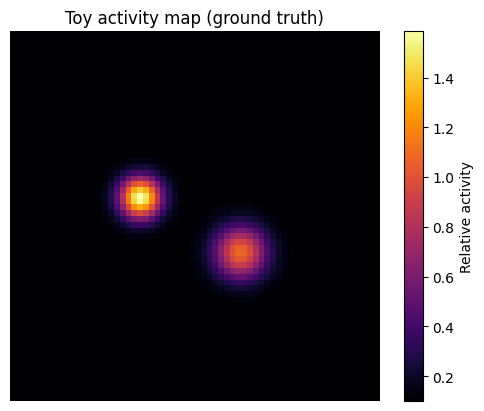

In [8]:
# Create a toy activity distribution (two hot spots + background)
N = 64
yy, xx = np.mgrid[-1:1:complex(0,N), -1:1:complex(0,N)]

activity = 0.1*np.ones((N,N))
activity += 1.5*np.exp(-((xx+0.3)**2 + (yy+0.1)**2)/(2*(0.08**2)))
activity += 1.0*np.exp(-((xx-0.25)**2 + (yy-0.2)**2)/(2*(0.10**2)))

plt.imshow(activity, cmap='inferno')
plt.title("Toy activity map (ground truth)")
plt.axis('off')
plt.colorbar(label="Relative activity")
plt.show()

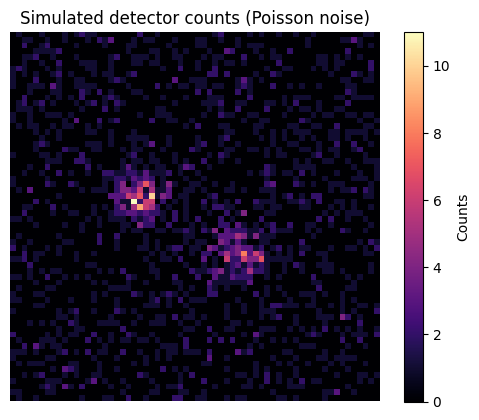

np.int64(1965)

In [9]:
# Simulate detected counts with Poisson noise
counts_scale = 2000   # increase for "more dose / longer scan"
expected_counts = activity / activity.sum() * counts_scale
counts = np.random.poisson(expected_counts)

plt.imshow(counts, cmap='magma')
plt.title("Simulated detector counts (Poisson noise)")
plt.axis('off')
plt.colorbar(label="Counts")
plt.show()

counts.sum()

### Try this
- Increase `counts_scale` to see how noise decreases (clearer image).  
- Decrease it to see how images become noisy.

This illustrates why scan time, injected activity, and detector efficiency affect image quality.


---
## ⭐ Optional: Interactive Decay Explorer (Half-life Slider)

If sliders work in your environment, use this to explore decay curves quickly.
If not, you can skip it.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

try:
    from ipywidgets import interact, FloatSlider, IntSlider
except Exception as e:
    print("ipywidgets not available. You can skip this section.")
    print("Error:", e)

def decay_slider(T_half_hours=6.0, N0=100000, duration_hours=24):
    lam = math.log(2)/T_half_hours
    t = np.linspace(0, duration_hours, 400)
    N = N0*np.exp(-lam*t)
    A = lam*N

    plt.figure(figsize=(6,3))
    plt.plot(t, N/N0, label="N(t)/N0")
    plt.plot(t, A/A[0], label="A(t)/A0")
    plt.ylim(0, 1.05)
    plt.xlabel("Time (hours)")
    plt.ylabel("Relative")
    plt.title(f"Decay with half-life = {T_half_hours:.2f} h")
    plt.legend()
    plt.show()

try:
    interact(
        decay_slider,
        T_half_hours=FloatSlider(min=0.2, max=24.0, step=0.1, value=6.0, description="Half-life (h)"),
        N0=IntSlider(min=1000, max=500000, step=1000, value=100000, description="N0"),
        duration_hours=IntSlider(min=2, max=72, step=2, value=24, description="Duration (h)")
    )
except Exception as e:
    print("Interactive display not available here. That's okay—skip this section.")
    print("Error:", e)

---
## 🧠 Big Picture Takeaways

- Radioactive decay is well-described (on average) by an exponential law  
- Half-life controls how fast activity (and imaging signal) decreases  
- PET/SPECT isotopes are chosen to match physiology + logistics + safety  
- Count data is noisy (Poisson statistics): more counts → clearer images  
- Imaging timing balances tracer uptake against radioactive decay  

